<h1 style="text-align: center; font-size: 1000%; text-decoration: underline;">Lab 6</h1>
<h2 style="text-align: center; font-size: 250%;">Ido Israeli (ID - 212432439)<br>Jonathan Derhy (ID - 315856377)</h2>

In [43]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

<h3>Loading Train Data</h3>

In [44]:
dfTrain = pd.read_csv('.\External\Data\TrainData.csv')
dfTrain

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,...,24.22,31.59,156.10,1750.0,0.1190,0.3539,0.40980,0.15730,0.3689,0.08368
1,0,13.300,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,...,14.20,29.20,92.94,621.2,0.1140,0.1667,0.12120,0.05614,0.2637,0.06658
2,0,12.220,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,...,13.16,24.17,85.13,515.3,0.1402,0.2315,0.35350,0.08088,0.2709,0.08839
3,0,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,0.1387,...,11.24,22.99,74.32,376.5,0.1419,0.2243,0.08434,0.06528,0.2502,0.09209
4,1,21.100,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,...,25.68,32.07,168.20,2022.0,0.1368,0.3101,0.43990,0.22800,0.2268,0.07425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0,13.680,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,0.1631,...,15.85,20.20,101.60,773.4,0.1264,0.1564,0.12060,0.08704,0.2806,0.07782
451,0,11.290,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,...,12.32,16.18,78.27,457.5,0.1358,0.1507,0.12750,0.08750,0.2733,0.08022
452,0,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,...,15.15,31.82,99.00,698.8,0.1162,0.1711,0.22820,0.12820,0.2871,0.06917
453,1,20.160,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,0.1928,...,23.06,23.03,150.20,1657.0,0.1054,0.1537,0.26060,0.14250,0.3055,0.05933


<h4>Extracting Train Classifications into Ytrain</h4>

In [45]:
Ytrain = dfTrain["diagnosis"].values
Ytrain

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,

<h4>Extracting Train Core Data into Xtrain</h4>

In [46]:
Xtrain = dfTrain[dfTrain.columns[1:]].values
Xtrain

array([[2.026e+01, 2.303e+01, 1.324e+02, ..., 1.573e-01, 3.689e-01,
        8.368e-02],
       [1.330e+01, 2.157e+01, 8.524e+01, ..., 5.614e-02, 2.637e-01,
        6.658e-02],
       [1.222e+01, 2.004e+01, 7.947e+01, ..., 8.088e-02, 2.709e-01,
        8.839e-02],
       ...,
       [1.349e+01, 2.230e+01, 8.691e+01, ..., 1.282e-01, 2.871e-01,
        6.917e-02],
       [2.016e+01, 1.966e+01, 1.311e+02, ..., 1.425e-01, 3.055e-01,
        5.933e-02],
       [1.049e+01, 1.929e+01, 6.741e+01, ..., 3.203e-02, 2.826e-01,
        7.552e-02]])

<h3>Loading Test Data</h3>

In [47]:
dfTest = pd.read_csv('.\External\Data\TestData.csv')
dfTest

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,16.74,21.59,110.10,869.5,0.09610,0.13360,0.134800,0.060180,0.1896,...,20.01,29.02,133.50,1229.0,0.15630,0.38350,0.540900,0.18130,0.4863,0.08633
1,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.88,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.19320,0.3063,0.08368
2,1,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.256500,0.150400,0.2569,...,25.30,31.86,171.10,1938.0,0.15920,0.44920,0.534400,0.26850,0.5558,0.10240
3,0,11.08,14.71,70.21,372.7,0.10060,0.05743,0.023630,0.025830,0.1566,...,11.35,16.82,72.01,396.5,0.12160,0.08240,0.039380,0.04306,0.1902,0.07313
4,0,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.011490,0.1613,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.016740,0.02680,0.2280,0.07028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.320100,0.159500,0.1648,...,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.320100,0.15950,0.1648,0.05525
110,0,12.54,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,...,13.72,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521
111,1,17.35,23.06,111.00,933.1,0.08662,0.06290,0.028910,0.028370,0.1564,...,19.85,31.47,128.20,1218.0,0.12400,0.14860,0.121100,0.08235,0.2452,0.06515
112,1,20.20,26.83,133.70,1234.0,0.09905,0.16690,0.164100,0.126500,0.1875,...,24.19,33.81,160.00,1671.0,0.12780,0.34160,0.370300,0.21520,0.3271,0.07632


<h4>Extracting Test Classifications into Ytest</h4>

In [48]:
Ytest = dfTest["diagnosis"].values
Ytest

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0], dtype=int64)

<h4>Extracting Test Core Data into Xtest</h4>

In [49]:
Xtest = dfTest[dfTest.columns[1:]].values
Xtest

array([[1.674e+01, 2.159e+01, 1.101e+02, ..., 1.813e-01, 4.863e-01,
        8.633e-02],
       [1.825e+01, 1.998e+01, 1.196e+02, ..., 1.932e-01, 3.063e-01,
        8.368e-02],
       [2.034e+01, 2.151e+01, 1.359e+02, ..., 2.685e-01, 5.558e-01,
        1.024e-01],
       ...,
       [1.735e+01, 2.306e+01, 1.110e+02, ..., 8.235e-02, 2.452e-01,
        6.515e-02],
       [2.020e+01, 2.683e+01, 1.337e+02, ..., 2.152e-01, 3.271e-01,
        7.632e-02],
       [1.411e+01, 1.288e+01, 9.003e+01, ..., 5.890e-02, 2.100e-01,
        7.083e-02]])

<h3>Loading The Coefficients</h3>

<h4>Loading Coefficients1 into W_1</h4>

In [50]:
W_1 = pd.read_csv('.\External\Coefficients\Coefficients1.csv', header = None).values[:,0]
print("W_1:\n" + str(W_1))

W_1:
[-0.24051694 -1.28880728 -0.36962803 -0.12141193  0.01189173  0.04758857
  0.21983976  0.32611402  0.13494155  0.08678048  0.01065719 -0.07070465
 -0.44975324 -0.27664928  0.10552783  0.00375172  0.04655467  0.06966227
  0.0171825   0.01575658  0.00419185 -1.51903808  0.46308372  0.21284544
  0.01968184  0.08338499  0.63301259  0.85841348  0.25692222  0.21309401
  0.06045903]


<h4>Loading Coefficients2 into W_2</h4>

In [51]:
W_2 = pd.read_csv('.\External\Coefficients\Coefficients2.csv', header = None).values[:,0]
print("W_2:\n" + str(W_2))

W_2:
[-0.24905703 -1.28051636 -0.35943074 -0.11699259  0.00980262  0.04166949
  0.23260228  0.33917977  0.13511828  0.07738392  0.0069529  -0.06492399
 -0.44184093 -0.27944314  0.08919083  0.00773273  0.03781426  0.08210222
  0.01682068  0.01893739 -0.01471771 -1.51735691  0.46048118  0.21775737
  0.01619036  0.08014986  0.611179    0.83697098  0.25988656  0.21811395
  0.04032636]


<h3>Functions</h3>

In [52]:
def probabilisticLogRegClassifier(W, X):
    """
    This Function
    """
    return 1/(1+np.exp(-(X@W[1:] + W[0])))

In [53]:
def probabilisticLogRegClassifierForMatrix(W, X):
    """
    This Function
    """
    Y = []
    for x in X:
        Y.append(probabilisticLogRegClassifier(W, x))
    return np.array(Y)

In [54]:
def finalClassification(prb_Ypredicted_equals_one, th):
    if th > 1 or th < 0:
        print("th should be 0<=th<=1")
        return
    Y = []
    for prb_y_is_one in prb_Ypredicted_equals_one:
        Y.append(1.0 if prb_y_is_one >= th else 0.0)
    return np.array(Y)

In [55]:
def accuracy(actualY, predictedY):
    """
    This Function
    """
    return 100*(predictedY == actualY).mean()

In [56]:
def printAccuracy(actualY, predictedY):
    """
    This Function
    """
    print(f'{accuracy(actualY, predictedY)}%')
    return

In [57]:
def confusionMatrix(actualY, predictedY):
    confusion_matrix = np.zeros([2, 2])
    values = [0, 1]
    for actual in values:
        for pred in values:
            confusion_matrix[actual, pred] = ((actualY == actual)*(predictedY == pred)).sum()
    return confusion_matrix

In [58]:
def confusionMatrixWithThreshold(W, X, Y, th):
    final_classification = finalClassification(probabilisticLogRegClassifier(W, X), th)
    return confusionMatrix(Y, final_classification)

In [59]:
def printConfusionMatrix(W, X, Y, th):
    confusion_matrix = confusionMatrixWithThreshold(W, X, Y, th)
    indexes = [0, 1]
    confusion_matrix = pd.DataFrame(data = confusion_matrix, columns = indexes, index = indexes)
    print(f'\nConfusion Matrix with th={th}\n{confusion_matrix}')
    return

In [60]:
from sklearn.metrics import roc_curve, auc

def drawROC(actualY, prob_y_is_one, title):
    # Compute the false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(actualY,  prob_y_is_one)
    # Compute the area under the curve
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve\n(area = %0.2f)' % roc_auc)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    return

<h2>Metrics For Train with Coefficients1</h2>

In [61]:
Y_probability_of_one = probabilisticLogRegClassifierForMatrix(W_1, Xtrain)
# print(Y_probability_of_one)

In [62]:
th = 0.5
Ypredict_train = finalClassification(Y_probability_of_one, th)
# print(Ypredict_train)

<h4>Accuracy</h4>

In [63]:
printAccuracy(Ytrain, Ypredict_train)

95.38461538461539%


<h4>Confusion Matrix</h4>

In [64]:
printConfusionMatrix(W_1, Xtrain, Ytrain, th)


Confusion Matrix with th=0.5
       0      1
0  281.0    8.0
1   13.0  153.0


<h4>ROC</h4>

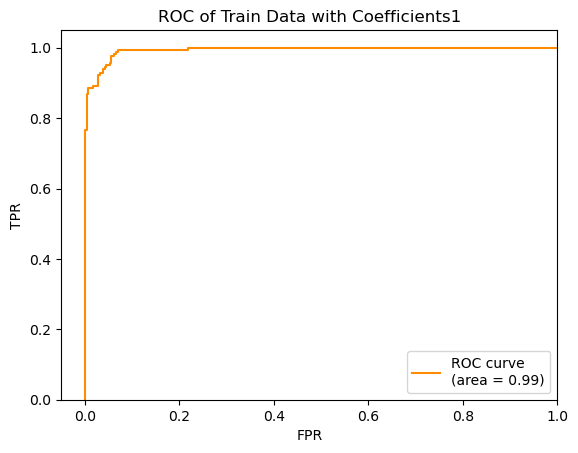

In [65]:
drawROC(Ytrain, Y_probability_of_one, 'ROC of Train Data with Coefficients1')

<h2>Metrics For Test with Coefficients1</h2>

In [66]:
Y_probability_of_one = probabilisticLogRegClassifierForMatrix(W_1, Xtest)
# print(Y_probability_of_one)

In [67]:
th = 0.5
Ypredict_test = finalClassification(Y_probability_of_one, th)
# print(Ypredict_test)

<h4>Accuracy</h4>

In [68]:
printAccuracy(Ytest, Ypredict_test)

93.85964912280701%


<h4>Confusion Matrix</h4>

In [69]:
printConfusionMatrix(W_1, Xtest, Ytest, th)


Confusion Matrix with th=0.5
      0     1
0  66.0   2.0
1   5.0  41.0


<h4>ROC</h4>

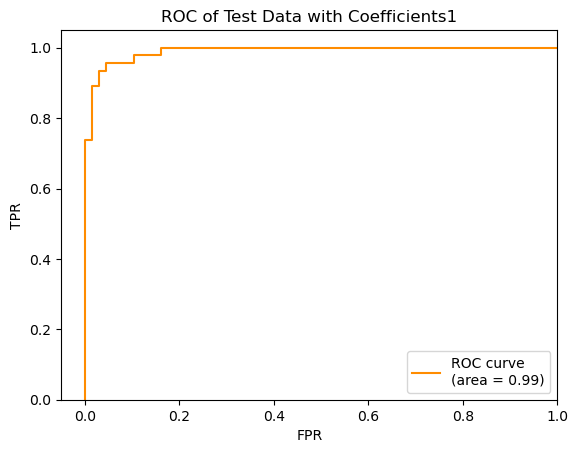

In [70]:
drawROC(Ytest, Y_probability_of_one, 'ROC of Test Data with Coefficients1')

--------------------------------------------

<h2>Metrics For Train with Coefficients2</h2>

In [71]:
Y_probability_of_one = probabilisticLogRegClassifierForMatrix(W_2, Xtrain)
# print(Y_probability_of_one)

In [72]:
th = 0.5
Ypredict_train = finalClassification(Y_probability_of_one, th)
# print(Ypredict_train)

<h4>Accuracy</h4>

In [73]:
printAccuracy(Ytrain, Ypredict_train)

89.01098901098901%


<h4>Confusion Matrix</h4>

In [74]:
printConfusionMatrix(W_2, Xtrain, Ytrain, th)


Confusion Matrix with th=0.5
       0      1
0  289.0    0.0
1   50.0  116.0


<h4>ROC</h4>

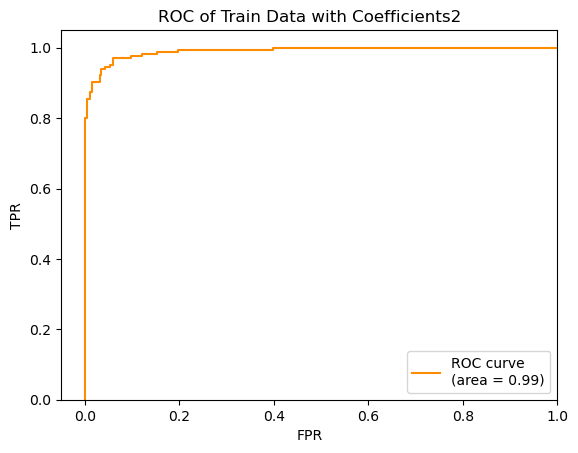

In [75]:
drawROC(Ytrain, Y_probability_of_one, 'ROC of Train Data with Coefficients2')

<h2>Metrics For Test with Coefficients2</h2>

In [76]:
Y_probability_of_one = probabilisticLogRegClassifierForMatrix(W_2, Xtest)
# print(Y_probability_of_one)

In [77]:
th = 0.5
Ypredict_test = finalClassification(Y_probability_of_one, th)
# print(Ypredict_test)

<h4>Accuracy</h4>

In [78]:
printAccuracy(Ytest, Ypredict_test)

86.8421052631579%


<h4>Confusion Matrix</h4>

In [79]:
printConfusionMatrix(W_2, Xtest, Ytest, th)


Confusion Matrix with th=0.5
      0     1
0  68.0   0.0
1  15.0  31.0


<h4>ROC</h4>

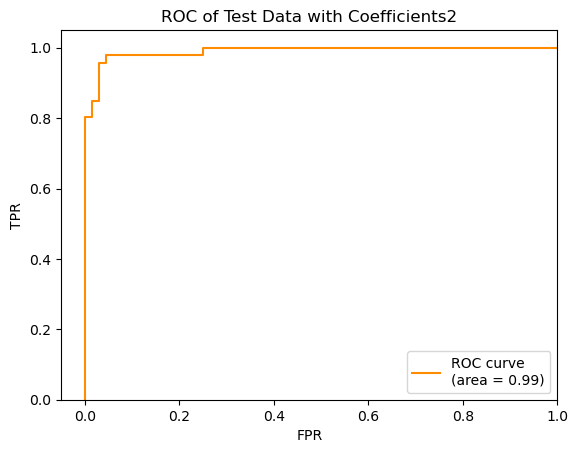

In [80]:
drawROC(Ytest, Y_probability_of_one, 'ROC of Test Data with Coefficients2')